<a href="https://colab.research.google.com/github/emredeveloper/VeriBilimi-Projeler/blob/main/Airline_Passengers_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tabulate


In [6]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from datetime import datetime
import warnings
from tabulate import tabulate

# Uyarıların gizlenmesi
warnings.filterwarnings("ignore")

# Grafikleri Jupyter Notebook içinde göstermek için
%matplotlib inline

# Rastgelelik kontrolü için seed ayarlanması
np.random.seed(42)

In [7]:
# Veri kümesinin yüklenmesi
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, index_col='Month', parse_dates=True)

# İlk birkaç satırın incelenmesi
print(data.head())

# Verinin genel bilgilerinin incelenmesi
print(data.info())

# Verinin özetinin alınması
data_summary = data.describe()

# Veriyi tabulate kullanarak yazdırma
print(tabulate(data_summary, headers='keys', tablefmt='fancy_grid', numalign='right', stralign='center'))

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
╒═══════╤══════════════╕
│       │   Passengers │
╞═══════╪══════════════╡
│ count │          144 │
├───────┼──────────────┤
│ mean  │      280.299 │
├───────┼──────────────┤
│  std  │      119.966 │
├───────┼──────────────┤
│  min  │          104 │
├───────┼──────────────┤
│  25%  │          180 │
├───────┼──────────────┤
│  50%  │        265.5 │
├───────┼──────────────┤
│  75%  │        360.5 │
├───────┼──────────────┤
│  max  │          622 │
╘═══════╧══════════════╛


Passengers    0
dtype: int64


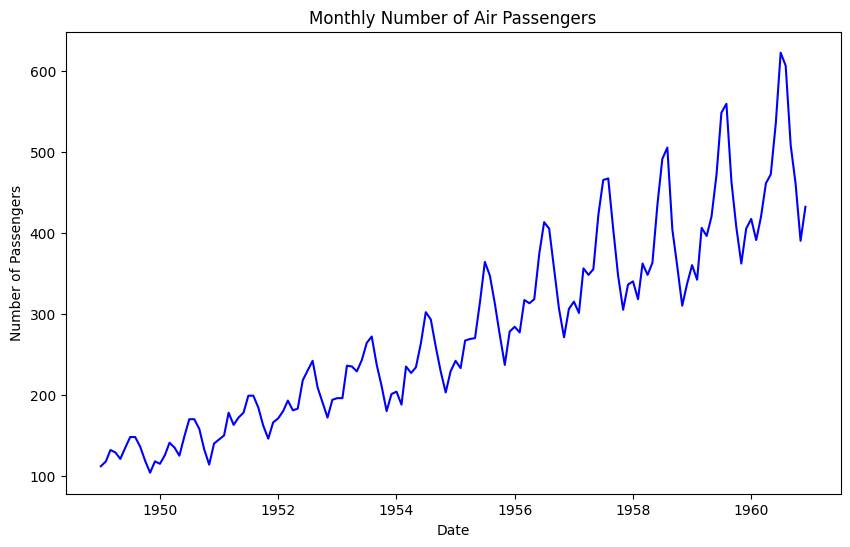

In [8]:
# Eksik değerlerin kontrol edilmesi
print(data.isnull().sum())

# Zaman serisi grafiğinin çizilmesi
plt.figure(figsize=(10, 6))
plt.plot(data, color='blue')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

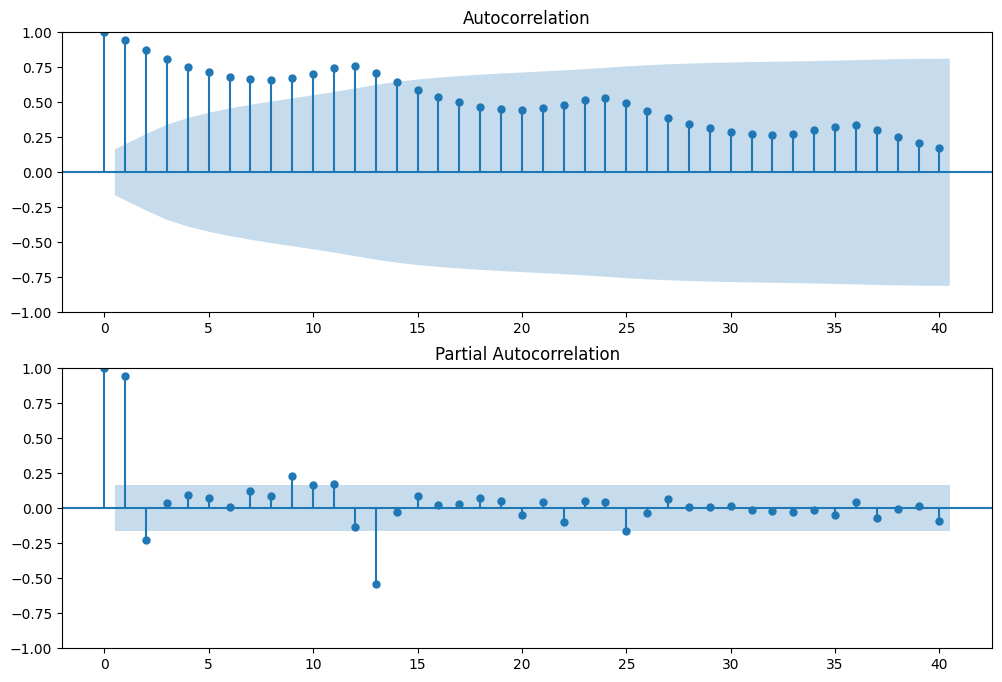

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                ARIMA(13, 1, 2)   Log Likelihood                -557.173
Date:                Sun, 09 Jun 2024   AIC                           1146.346
Time:                        19:21:01   BIC                           1193.751
Sample:                    01-01-1949   HQIC                          1165.609
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4828      0.451     -1.070      0.285      -1.368       0.402
ar.L2         -0.0743      0.099     -0.752      0.452      -0.268       0.119
ar.L3         -0.0160      0.058     -0.276      0.7

In [13]:
# Zaman serisinin istatistiksel özelliklerinin kontrol edilmesi
fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(data, lags=40, ax=ax[0])
plot_pacf(data, lags=40, ax=ax[1])
plt.show()

# ARIMA modelinin oluşturulması
p = 13
d = 1
q = 2
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

# Modelin özetinin yazdırılması
print(model_fit.summary())



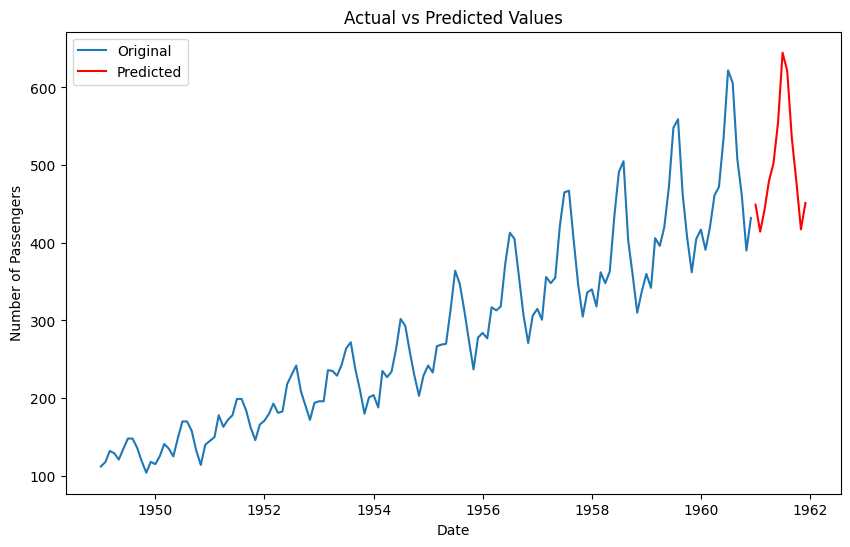

In [14]:
# Tahminlerin yapılması
predictions = model_fit.predict(start=len(data), end=len(data)+11, typ='levels')

# Gerçek ve tahmin edilen değerlerin karşılaştırılması
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

1961-01-01    449.031710
1961-02-01    414.371859
1961-03-01    441.127305
1961-04-01    479.637659
1961-05-01    502.039043
1961-06-01    555.556011
1961-07-01    644.696280
1961-08-01    621.358310
1961-09-01    534.595343
1961-10-01    479.571120
1961-11-01    417.289339
1961-12-01    451.338407
1962-01-01    471.107372
1962-02-01    433.753848
1962-03-01    453.262273
1962-04-01    495.087601
1962-05-01    521.439337
1962-06-01    573.348268
1962-07-01    657.756893
1962-08-01    633.648426
1962-09-01    552.131440
1962-10-01    495.072723
1962-11-01    437.059791
1962-12-01    466.549828
1963-01-01    486.474695
1963-02-01    448.568915
1963-03-01    460.553592
1963-04-01    505.864062
1963-05-01    535.458903
1963-06-01    586.905781
1963-07-01    665.905454
1963-08-01    641.970648
1963-09-01    564.590016
1963-10-01    507.116999
1963-11-01    452.484042
1963-12-01    477.904741
1964-01-01    497.656183
1964-02-01    459.453346
1964-03-01    465.007144
1964-04-01    512.868632


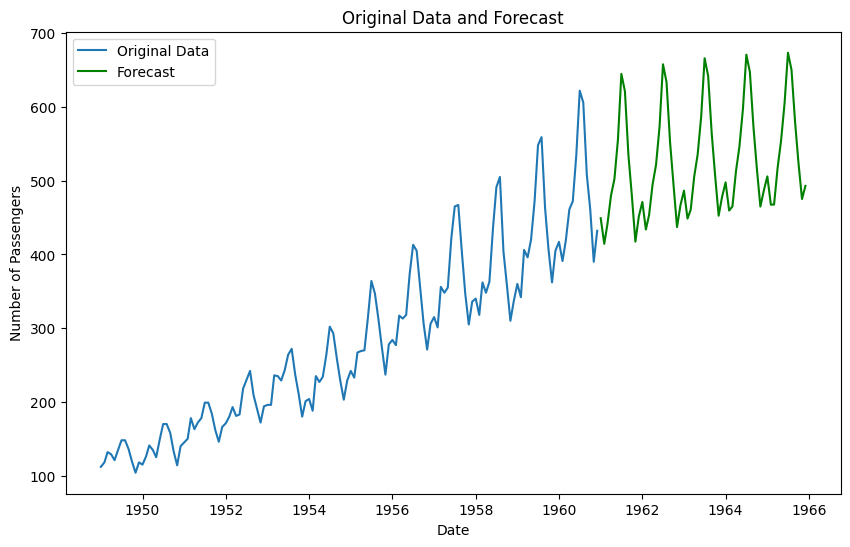

In [17]:
# Gelecek için tahminlerin yapılması
forecast_steps = 60 # 12 aylık tahmin
forecast = model_fit.forecast(steps=forecast_steps)

# Tahmin edilen değerlerin yazdırılması
print(forecast)

# Orijinal veri ve tahmin edilen verinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast, color='green', label='Forecast')
plt.legend()
plt.title('Original Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
ADF Statistic (differenced): -2.8292668241700047
p-value (differenced): 0.05421329028382478
                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -564.530
Date:                              Sun, 09 Jun 2024   AIC                           1141.059
Time:                                      19:40:41   BIC                           1158.836
Sample:                                  01-01-1949   HQIC                          1148.283
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------

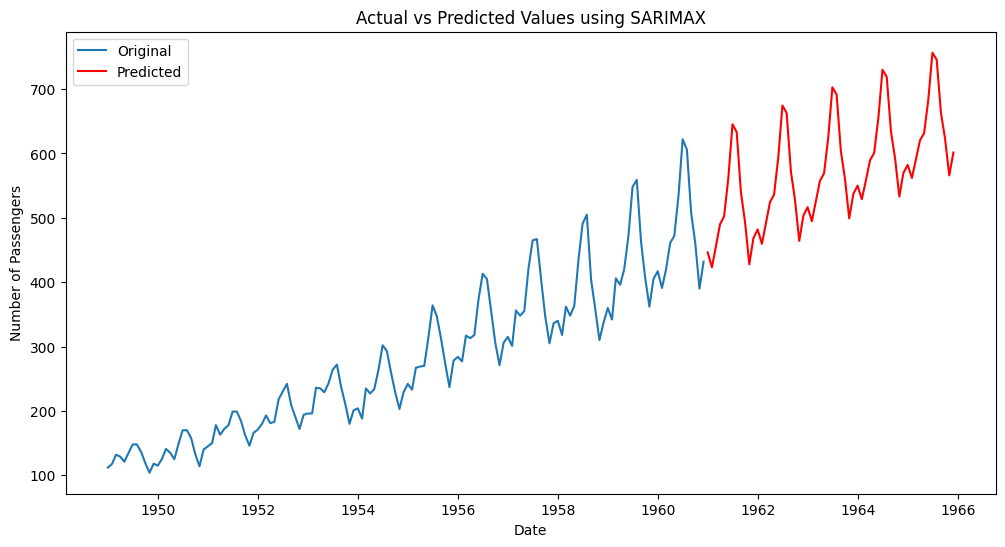

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings

# Uyarıların gizlenmesi
warnings.filterwarnings("ignore")

# Grafikleri Jupyter Notebook içinde göstermek için
%matplotlib inline

# Veri kümesinin yüklenmesi
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, index_col='Month', parse_dates=True)

# Zaman serisinin durağanlığını kontrol etme (ADF Testi)
result = adfuller(data['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Fark alma işlemi
data_diff = data.diff().dropna()

# Fark alınmış verinin durağanlığını kontrol etme (ADF Testi)
result_diff = adfuller(data_diff['Passengers'])
print(f'ADF Statistic (differenced): {result_diff[0]}')
print(f'p-value (differenced): {result_diff[1]}')

# SARIMAX Modelinin oluşturulması
# Değişkenleri yeniden yapılandır
model = SARIMAX(data, order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))

# Modelin eğitilmesi
model_fit = model.fit()

# Modelin özetinin yazdırılması
print(model_fit.summary())

# Tahminlerin yapılması
predictions = model_fit.get_forecast(steps=60)
pred_index = pd.date_range(data.index[-1], periods=60, freq='M')

# Gerçek ve tahmin edilen değerlerin karşılaştırılması
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original')
plt.plot(pred_index, predictions.predicted_mean, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()
